In [11]:
import numpy as np
from scipy import stats
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

# RASP code for linear regression

####  --- Initialize constants ---
LOAD R30, 3          ; R30 = 3


####  --- Load x values ---
LOAD R1, 1           ; x0 = 1

LOAD R2, 2           ; x1 = 2

LOAD R3, 3           ; x2 = 3


####  --- Load y values ---
LOAD R4, 2           ; y0 = 2

LOAD R5, 4           ; y1 = 4

LOAD R6, 5           ; y2 = 5


####  --- Compute x_sum = x0 + x1 + x2 ---
ADD R1, R2, R7       ; R7 = x0 + x1

ADD R7, R3, R7       ; R7 = x0 + x1 + x2


####  --- Compute y_sum = y0 + y1 + y2 ---
ADD R4, R5, R8       ; R8 = y0 + y1

ADD R8, R6, R8       ; R8 = y0 + 
y1 + y2


####  --- x_mean = x_sum // 3 ---
DIV R7, R30, R9      ; R9 = x_mean


####  --- y_mean = y_sum // 3 ---
DIV R8, R30, R10     ; R10 = y_mean


####  --- Compute dx0 = x0 - x_mean ---
SUB R1, R9, R11


####  dy0 = y0 - y_mean
SUB R4, R10, R12


####  term0 = dx0 * dy0
MUL R11, R12, R13


####  dx1 = x1 - x_mean
SUB R2, R9, R14

####  dy1 = y1 - y_mean
SUB R5, R10, R15

####  term1 = dx1 * dy1
MUL R14, R15, R16


####  dx2 = x2 - x_mean
SUB R3, R9, R17

####  dy2 = y2 - y_mean
SUB R6, R10, R18

####  term2 = dx2 * dy2
MUL R17, R18, R19


####  numerator = term0 + term1 + term2
ADD R13, R16, R20

ADD R20, R19, R21     ; R21 = num


####  Compute denominator:
####  sq0 = dx0^2
MUL R11, R11, R11     ; overwrite R11 with dx0^2

####  sq1 = dx1^2
MUL R14, R14, R14     ; overwrite R14 with dx1^2

####  sq2 = dx2^2
MUL R17, R17, R17     ; overwrite R17 with dx2^2


####  den = sq0 + sq1 + sq2
ADD R11, R14, R22

ADD R22, R17, R22     ; R22 = den


####  slope = num // den
DIV R21, R22, R23     ; R23 = slope


####  intercept = y_mean - slope * x_mean
MUL R23, R9, R25      ; slope * x_mean → R25

SUB R10, R25, R24     ; intercept = y_mean - m*x̄


####  HALT
HALT


## Initialize variables

In [30]:
N = 3 # number of data points
r = np.zeros((26,)) # init registers with zeros
pc = 0 # init program counter
halt = False # init halt flag



## Sample data

w: [0.95312567]


/var/folders/h_/wy6y3sfs1254rd40kbxmvsw00000gn/T/ipykernel_19226/543967327.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


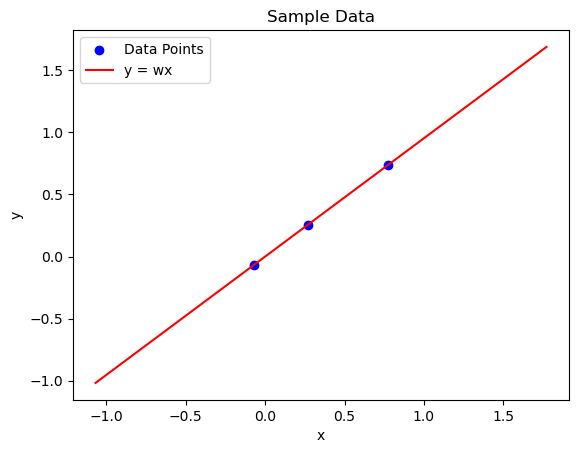

In [27]:
w = stats.uniform.rvs(loc=-1, scale=2, size=1, random_state=rng)
print("w:", w)
x = stats.norm.rvs(loc=0, scale=1, size=N, random_state=rng)
y = w * x

#plot the x,y pairs
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data Points', color='blue')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sample Data")

#plot a line with slope w and intercept 0
x_line = np.linspace(min(x)-1, max(x)+1, 100)
y_line = w * x_line
ax.plot(x_line, y_line, color='red', label='y = wx')
ax.legend()

fig.show()


currently hard-coded for N=3

In [ ]:
def run_rasp_scalar_lin_reg(N,x,y,r,pc,halt):
    """
    Run the RASP scalar linear regression program.
    
    Parameters:
    x : np.ndarray
        Input data points.
    y : np.ndarray
        Output data points.
    r : np.ndarray
        Registers.
    pc : int
        Program counter.
    halt : bool
        Halt flag.
    
    Returns:
    r : np.ndarray
        Updated registers.
    pc : int
        Updated program counter.
    halt : bool
        Updated halt flag.
    """
    # Placeholder for the actual RASP program logic
    # This function should implement the RASP instructions for linear regression
    pc = 0
    r[-1] = N  # Store the number of data points in the last register

    for i in range(len(x)):
        pc += 1  # Increment program counter
        r[i] = x[i]
    for i in range(len(y)):
        pc += 1  # Increment program counter
        r[i + N] = y[i]  # Store y values in the next N

    #compute sum of x and y
    pc += 1  # Increment program counter
    r[N + N] = r[0] + r[1]  # Store sum of x1 and x2 in register N+N

    pc += 1  # Increment program counter
    r[N + N] += r[2]  # Add x3 to the sum

    pc += 1  # Increment program counter
    r[N + N + 1] = r[N] + r[N + 1]  # Store sum of y1 and y2 in register N+N+1
    pc += 1  # Increment program counter
    r[N + N + 1] += r[N + 2]  # Add y3 to the sum

    # Compute the mean of x and y
    pc += 1  # Increment program counter
    r[N + N + 2] = r[N + N] / r[-1]  # Mean of x
    pc += 1  # Increment program counter
    r[N + N + 3] = r[N + N + 1] / r[-1]  # Mean of y

    #compute centered x1 and y1
    pc += 1  # Increment program counter
    r[N + N + 4] = r[0] - r[N + N + 2]  # Center x1

    pc += 1  # Increment program counter
    r[N + N + 5] = r[N] - r[N + N + 3]  # Center y1

    #compute term1
    pc += 1  # Increment program counter
    r[N + N + 6] = r[N + N + 4] * r[N + N + 5]  # Square of centered x1

    #compute centered x2 and y2
    pc += 1  # Increment program counter
    r[N + N + 7] = r[1] - r[N + N + 2]  # Center x2
    pc += 1  # Increment program counter
    r[N + N + 8] = r[N + 1] - r[N + N + 3]  # Center y2

    #compute term2
    pc += 1  # Increment program counter
    r[N + N + 9] = r[N + N + 7] * r[N + N + 8]  # Square of centered x2

    #compute centered x3 and y3
    pc += 1  # Increment program counter
    r[N + N + 10] = r[2] - r[N + N + 2]  # Center x3
    pc += 1  # Increment program counter
    r[N + N + 11] = r[N + 2] - r[N + N + 3]  # Center y3

    #compute term3
    pc += 1  # Increment program counter
    r[N + N + 12] = r[N + N + 10] * r[N + N + 11]  # Square of centered x3

    # Sum the terms
    pc += 1  # Increment program counter
    r[N + N + 13] = r[N + N + 6] + r[N + N + 9] # Sum of term1 and term2
    pc += 1  # Increment program counter
    r[N + N + 13] += r[N + N + 12]





    print("Registers after loading data:", r)
    print("Program counter after loading data:", pc)


    return r, pc, halt


In [31]:
run_rasp_scalar_lin_reg(N, x, y, r, pc, halt)

Registers after loading data: [ 0.77180747 -0.06785706  0.2691973   0.73562952 -0.06467631  0.25657886
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          3.        ]
Program counter after loading data: 6


(array([ 0.77180747, -0.06785706,  0.2691973 ,  0.73562952, -0.06467631,
         0.25657886,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         3.        ]),
 6,
 False)